In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DATASET.csv', na_values='?',encoding= 'unicode_escape') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,7,9,10,11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset

,SI. No.,YEAR,MONTH,DATE,(UTC),(IST),Mw,Mw,Mb,Mb.1,Ms,ML,LAT (N),LONG (E),DEPTH (km),MM,MMI,MME,LOCATION,REFERENCE
0,1,2474,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
1,2,325,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,3,25,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,4,26,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC
4,5,26,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,6.075520196,5.999685205,26,97,80.0,NaN,NaN,NaN,Myanmar,G-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52984,52970,2019,7,28.0,19:24:08,00:54:08/2019-07-29/,3.2000,3.2,NaN,3.07428,2.32377,2.91501,32.8°N,78.4°E,10.0,NaN,NaN,NaN,Jammu & Kashmir,NaN
52985,52971,2019,7,28.0,10:44:10,16:14:10,3.6000,3.6,NaN,3.43659,2.78301,3.33473,25.5°N,90.4°E,70.0,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52986,52972,2019,7,28.0,21:25:06,7/29/2019 2:55,4.0000,4,NaN,3.79891,3.24225,3.75446,23.2°N,86.5°E,22.0,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52987,52973,2019,7,29.0,03:33:53,09:03:53,4.3000,4.3,NaN,4.07065,3.58668,4.06925,32.8°N,76.4°E,20.0,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


**Dropping Unwanted Columns**

In [ ]:
pd.set_option('display.max_rows', 25)
dataset.isnull().sum()

SI. No.           0
YEAR              0
MONTH            18
DATE             57
(UTC)         31803
(IST)         52563
Mw            12054
Mw             2504
Mb            40706
Mb.1           2492
Ms              166
ML              166
LAT (N)           0
LONG (E)          0
DEPTH (km)     2178
MM            52948
MMI           52989
MME           52989
LOCATION      43615
REFERENCE      1582
dtype: int64

**Removing string columns and columns with 50% above NULL values**

In [ ]:
dataset.drop(dataset.columns[[0,4,5,6,8,15,16,17,18,19]], axis = 1, inplace = True)

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,LAT (N),LONG (E),DEPTH (km)
0,2474,0.0,0.0,7.5000,6.969203,7.260620,7.427072,71,24,0.0
1,325,0.0,0.0,7.5000,6.969203,7.260620,7.427072,71,24,0.0
2,25,0.0,0.0,7.5000,6.969203,7.260620,7.427072,72.9,33.72,0.0
3,26,5.0,10.0,6.1397,5.737047,5.698852,5.999685,17.3,80.1,NaN
4,26,5.0,10.0,6.1397,5.737047,6.075520,5.999685,26,97,80.0
...,...,...,...,...,...,...,...,...,...,...
52984,2019,7.0,28.0,3.2000,3.074275,2.323766,2.915005,32.8°N,78.4°E,10.0
52985,2019,7.0,28.0,3.6000,3.436594,2.783008,3.334732,25.5°N,90.4°E,70.0
52986,2019,7.0,28.0,4.0000,3.798913,3.242250,3.754460,23.2°N,86.5°E,22.0
52987,2019,7.0,29.0,4.3000,4.070652,3.586682,4.069255,32.8°N,76.4°E,20.0


**Removing degree from LAT and LONG columns**

In [ ]:
dataset['LAT_N'] = [(str(x).split('°')[0]) if '°' in str(x) else x for x in dataset['LAT (N)']]
dataset['LONG_E'] = [(str(x).split('°')[0]) if '°' in str(x) else x for x in dataset['LONG (E)']]

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,LAT (N),LONG (E),DEPTH (km),LAT_N,LONG_E
0,2474,0.0,0.0,7.5000,6.969203,7.260620,7.427072,71,24,0.0,71,24
1,325,0.0,0.0,7.5000,6.969203,7.260620,7.427072,71,24,0.0,71,24
2,25,0.0,0.0,7.5000,6.969203,7.260620,7.427072,72.9,33.72,0.0,72.9,33.72
3,26,5.0,10.0,6.1397,5.737047,5.698852,5.999685,17.3,80.1,NaN,17.3,80.1
4,26,5.0,10.0,6.1397,5.737047,6.075520,5.999685,26,97,80.0,26,97
...,...,...,...,...,...,...,...,...,...,...,...,...
52984,2019,7.0,28.0,3.2000,3.074275,2.323766,2.915005,32.8°N,78.4°E,10.0,32.8,78.4
52985,2019,7.0,28.0,3.6000,3.436594,2.783008,3.334732,25.5°N,90.4°E,70.0,25.5,90.4
52986,2019,7.0,28.0,4.0000,3.798913,3.242250,3.754460,23.2°N,86.5°E,22.0,23.2,86.5
52987,2019,7.0,29.0,4.3000,4.070652,3.586682,4.069255,32.8°N,76.4°E,20.0,32.8,76.4


In [ ]:
dataset.drop(dataset.columns[[7,8]], axis = 1, inplace = True)

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,DEPTH (km),LAT_N,LONG_E
0,2474,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.0,71,24
1,325,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.0,71,24
2,25,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.0,72.9,33.72
3,26,5.0,10.0,6.1397,5.737047,5.698852,5.999685,NaN,17.3,80.1
4,26,5.0,10.0,6.1397,5.737047,6.075520,5.999685,80.0,26,97
...,...,...,...,...,...,...,...,...,...,...
52984,2019,7.0,28.0,3.2000,3.074275,2.323766,2.915005,10.0,32.8,78.4
52985,2019,7.0,28.0,3.6000,3.436594,2.783008,3.334732,70.0,25.5,90.4
52986,2019,7.0,28.0,4.0000,3.798913,3.242250,3.754460,22.0,23.2,86.5
52987,2019,7.0,29.0,4.3000,4.070652,3.586682,4.069255,20.0,32.8,76.4


In [ ]:
dataset['YEAR '] = pd.to_numeric(dataset['YEAR '], errors='coerce')
dataset['MONTH '] = pd.to_numeric(dataset['MONTH '], errors='coerce')
dataset['DATE'] = pd.to_numeric(dataset['DATE'], errors='coerce')
dataset['Mw'] = pd.to_numeric(dataset['Mw'], errors='coerce')
dataset['Mb.1'] = pd.to_numeric(dataset['Mb.1'], errors='coerce')
dataset['Ms'] = pd.to_numeric(dataset['Ms'], errors='coerce')
dataset['ML'] = pd.to_numeric(dataset['ML'], errors='coerce')
dataset['DEPTH (km)'] = pd.to_numeric(dataset['DEPTH (km)'], errors='coerce')
dataset['LONG_E'] = pd.to_numeric(dataset['LONG_E'], errors='coerce')
dataset['LAT_N'] = pd.to_numeric(dataset['LAT_N'], errors='coerce')


In [ ]:
dataset['YEAR '] = dataset['YEAR '].astype(np.float64)
dataset['MONTH '] = dataset['MONTH '].astype(np.float64)
dataset['DATE'] = dataset['DATE'].astype(np.float64)
dataset['Mw'] = dataset['Mw'].astype(np.float64)
dataset['Mb.1'] = dataset['Mb.1'].astype(np.float64)
dataset['Ms'] = dataset['Ms'].astype(np.float64)
dataset['ML'] = dataset['ML'].astype(np.float64)
dataset['DEPTH (km)'] = dataset['DEPTH (km)'].astype(np.float64)
dataset['LONG_E'] = dataset['LONG_E'].astype(np.float64)
dataset['LAT_N'] = dataset['LAT_N'].astype(np.float64)

In [ ]:
dataset.isnull().sum()

YEAR             0
MONTH           20
DATE            57
Mw            2507
Mb.1          2507
Ms             169
ML             169
DEPTH (km)    2178
LAT_N         1138
LONG_E        1140
dtype: int64

In [ ]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()

YEAR          0
MONTH         0
DATE          0
Mw            0
Mb.1          0
Ms            0
ML            0
DEPTH (km)    0
LAT_N         0
LONG_E        0
dtype: int64

# **KNN**

**Taking threshold as 4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4 else 0 for x in dataset['Mw']]

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,DEPTH (km),LAT_N,LONG_E,DANGER
0,2474.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
1,325.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
2,25.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,72.9,33.72,1
3,26.0,5.0,10.0,6.1397,5.737047,5.698852,5.999685,45.569867,17.3,80.10,1
4,26.0,5.0,10.0,6.1397,5.737047,6.075520,5.999685,80.000000,26.0,97.00,1
...,...,...,...,...,...,...,...,...,...,...,...
52984,2019.0,7.0,28.0,3.2000,3.074275,2.323766,2.915005,10.000000,32.8,78.40,0
52985,2019.0,7.0,28.0,3.6000,3.436594,2.783008,3.334732,70.000000,25.5,90.40,0
52986,2019.0,7.0,28.0,4.0000,3.798913,3.242250,3.754460,22.000000,23.2,86.50,1
52987,2019.0,7.0,29.0,4.3000,4.070652,3.586682,4.069255,20.000000,32.8,76.40,1


**Splitting data in test train**

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Finding Best K for 4 threshold**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.9606653725870807, 0.8852613700698245]
3 : [0.9561091340450771, 0.9236962948984085]
4 : [0.9504744958481613, 0.9166509404290117]
5 : [0.9479941766418635, 0.9272818770837264]
6 : [0.9461069772457673, 0.9233817701453104]
7 : [0.9428987382724038, 0.9282883562936403]
8 : [0.9421168985225925, 0.9255205384663773]
9 : [0.939852259247277, 0.9275334968862049]
10 : [0.9404992990402243, 0.9265270176762911]
11 : [0.9381807397821633, 0.9287286909479776]
12 : [0.9381268197994177, 0.927030257281248]
13 : [0.9370484201445055, 0.9277851166886834]
14 : [0.9371562601099968, 0.9274705919355853]
15 : [0.9359969804809662, 0.9286657859973579]
16 : [0.9365092203170495, 0.9279738315405422]
17 : [0.935349940688019, 0.9284141661948795]
18 : [0.9353769006793918, 0.9279738315405422]
19 : [0.9339480211366332, 0.9279738315405422]
20 : [0.9345950609295806, 0.9280367364911618]


**plotting graph for k and test score**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


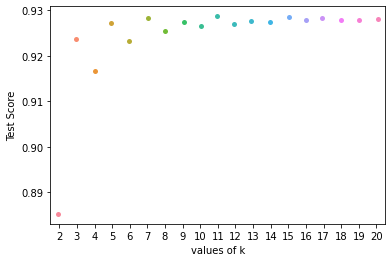

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

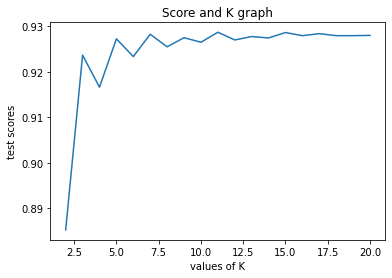

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Highest test accuracy at k = 11 and the score is 0.9287**

**Taking threshold as 4.2**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Best K for threshold 4.2**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.8948290736546964, 0.7331571994715984]
3 : [0.894748193680578, 0.8066301817953073]
4 : [0.8726949207376253, 0.7847392589796817]
5 : [0.8704572414536828, 0.8120400075485941]
6 : [0.859214925051224, 0.8029187897087501]
7 : [0.8547665264747115, 0.8131093917091275]
8 : [0.8514504475358567, 0.8060640372397307]
9 : [0.8470829289334627, 0.8124803422029314]
10 : [0.8448452496495201, 0.8054349877335346]
11 : [0.8411247708400733, 0.8130464867585079]
12 : [0.8425266903914591, 0.8091463798200919]
13 : [0.8373234120565082, 0.8132352016103668]
14 : [0.837889571875337, 0.8102786689312449]
15 : [0.8344656529709911, 0.8121658174498333]
16 : [0.8351396527553111, 0.8095867144744291]
17 : [0.8325514935835221, 0.8129835818078883]
18 : [0.832012293756066, 0.8104673837831037]
19 : [0.8290466947050577, 0.8114738629930176]
20 : [0.8295050145583953, 0.8105302887337233]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


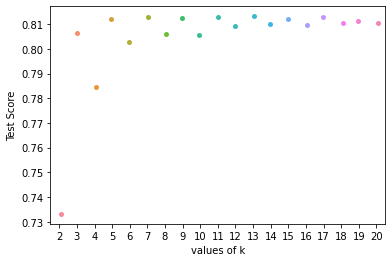

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

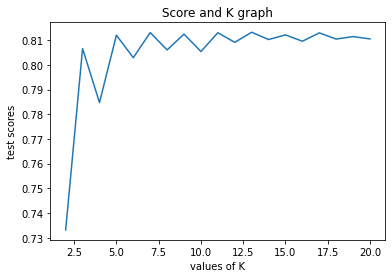

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**For threshold best k is 7 and the accuracy is 0.82**

**Taking threshold as 4.4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Finding best K for threshold 4.4**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.8611560444300658, 0.7037176825816192]
3 : [0.8665480427046264, 0.7378750707680695]
4 : [0.8301790143427155, 0.7242876014342329]
5 : [0.832281893669794, 0.7389444549286028]
6 : [0.8136255796398145, 0.7367427816569164]
7 : [0.814784859268845, 0.7405170786940932]
8 : [0.8027876631079478, 0.7381895955211675]
9 : [0.8037312628059959, 0.7424042272126816]
10 : [0.7948883856357166, 0.7403283638422344]
11 : [0.7957241453682735, 0.7394476945335597]
12 : [0.7898468672490024, 0.7400138390891363]
13 : [0.7894155073870376, 0.741523557904007]
14 : [0.7836999892160035, 0.7393847895829402]
15 : [0.7830529494230561, 0.7383154054224067]
16 : [0.778981990725763, 0.7383154054224067]
17 : [0.7783349509328157, 0.739258979681701]
18 : [0.7745335921492505, 0.7381895955211675]
19 : [0.7741831122614041, 0.7374347361137321]
20 : [0.7707861533484309, 0.7372460212618733]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


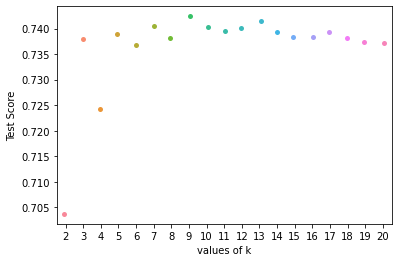

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

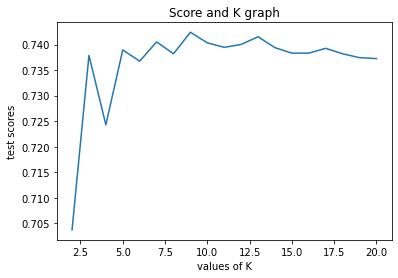

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**nest k is 9 and accuracy score is 0.75 for thresold 4.4**

**for threshold 4.6**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.6 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Finding best K for 4.6**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.8654426830583414, 0.7454236648424231]
3 : [0.8737733203925375, 0.7557400767440398]
4 : [0.8383748517200474, 0.7572497955589105]
5 : [0.8405046910384989, 0.7614644272504246]
6 : [0.8214709371293001, 0.7632886708183934]
7 : [0.8240590963010892, 0.7678807322136252]
8 : [0.8113339803731263, 0.7632257658677738]
9 : [0.8145961393292355, 0.7648612945838837]
10 : [0.8037851827887416, 0.7629112411146757]
11 : [0.8064272619432762, 0.7653016292382211]
12 : [0.798393184514181, 0.7624709064603384]
13 : [0.7992289442467378, 0.7627225262628169]
14 : [0.7932438261619756, 0.7600805183367931]
15 : [0.7957241453682735, 0.7622821916084795]
16 : [0.790871346921169, 0.7605208529911304]
17 : [0.7913027067831339, 0.7612128074479462]
18 : [0.7870699881376038, 0.7616531421022834]
19 : [0.7892537474388008, 0.7599547084355539]
20 : [0.7837808691901219, 0.7571868906082909]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


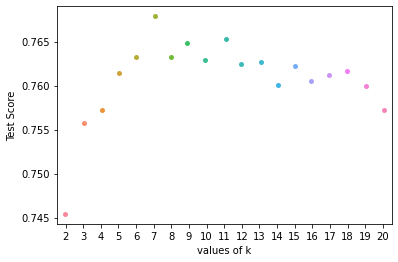

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

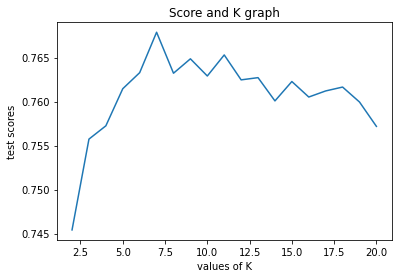

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**For 4.6 best k is 7 and score is 0.77**

**For Threshold 4.8**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.8 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Best K for 4.8**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.8831284373989, 0.7997735421777694]
3 : [0.8926183543621266, 0.7992073976221928]
4 : [0.8584600452927855, 0.8002138768321067]
5 : [0.865092203170495, 0.8015348807951186]
6 : [0.8468672490024803, 0.800968736239542]
7 : [0.8521244473201769, 0.8039881738692836]
8 : [0.8380782918149466, 0.8030445996099893]
9 : [0.8419066105898846, 0.8063785619928289]
10 : [0.8309878140838995, 0.8004025916839655]
11 : [0.8343578130054998, 0.8032962194124678]
12 : [0.8268629354038607, 0.799521922375291]
13 : [0.8295858945325137, 0.8029816946593696]
14 : [0.8232233365685323, 0.7976976788073221]
15 : [0.8262967755850318, 0.800968736239542]
16 : [0.8197724576728136, 0.798200918412279]
17 : [0.8230885366116683, 0.799836447128389]
18 : [0.8172921384665157, 0.797886393659181]
19 : [0.82012293756066, 0.8007800213876832]
20 : [0.8152162191308099, 0.7971944392023652]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


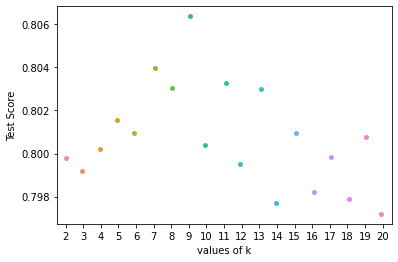

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

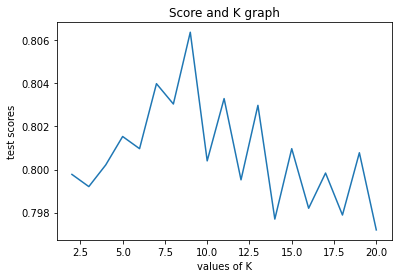

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**best k is 9 and score is 0.81 for 4.8**

**For threshold 5**

In [ ]:
dataset['DANGER'] = [1 if x >= 5 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,10].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Finding best k for 5**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)


2 : [0.9141324274776232, 0.8730578096496194]
3 : [0.9221395449153457, 0.868906082908725]
4 : [0.8969589129731479, 0.8727432848965213]
5 : [0.9029440310579101, 0.8738126690570548]
6 : [0.8878733958805133, 0.8741900987607725]
7 : [0.8928070743017362, 0.8748820532175883]
8 : [0.8831553973902728, 0.8736868591558156]
9 : [0.886417556346382, 0.8741271938101529]
10 : [0.8790035587188612, 0.8731836195508587]
11 : [0.8815108379165318, 0.8740013839089136]
12 : [0.8757413997627521, 0.8710448512297918]
13 : [0.8787878787878788, 0.871988425489086]
14 : [0.8730993206082174, 0.8694093225136819]
15 : [0.8756605197886337, 0.8719255205384664]
16 : [0.8714547611344764, 0.8693464175630622]
17 : [0.8732341205650814, 0.8702899918223564]
18 : [0.8690283619109241, 0.8665785997357992]
19 : [0.8703763614795643, 0.8685286532050073]
20 : [0.8671142025234552, 0.8658866452789834]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


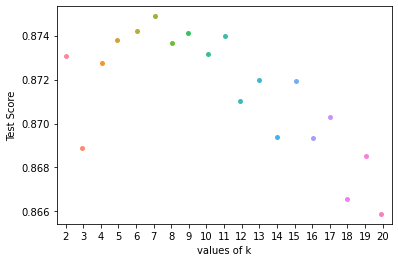

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

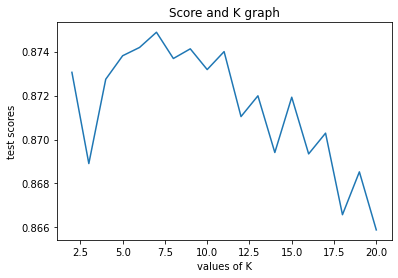

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Best k is 7 and score is 0.875**

# **Decision Tree**

**Taking threshold as 4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4 else 0 for x in dataset['Mw']]

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,DEPTH (km),LAT_N,LONG_E,DANGER
0,2474.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
1,325.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
2,25.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,72.9,33.72,1
3,26.0,5.0,10.0,6.1397,5.737047,5.698852,5.999685,45.569867,17.3,80.10,1
4,26.0,5.0,10.0,6.1397,5.737047,6.075520,5.999685,80.000000,26.0,97.00,1
...,...,...,...,...,...,...,...,...,...,...,...
52984,2019.0,7.0,28.0,3.2000,3.074275,2.323766,2.915005,10.000000,32.8,78.40,0
52985,2019.0,7.0,28.0,3.6000,3.436594,2.783008,3.334732,70.000000,25.5,90.40,0
52986,2019.0,7.0,28.0,4.0000,3.798913,3.242250,3.754460,22.000000,23.2,86.50,1
52987,2019.0,7.0,29.0,4.3000,4.070652,3.586682,4.069255,20.000000,32.8,76.40,1


**Splitting in test train**

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
dataset1

,YEAR,MONTH,DATE,DEPTH (km),LAT_N,LONG_E,DANGER
0,2474.0,0.0,0.0,0.0,71.0,24.00,1
1,325.0,0.0,0.0,0.0,71.0,24.00,1
2,25.0,0.0,0.0,0.0,72.9,33.72,1
3,26.0,5.0,10.0,NaN,17.3,80.10,1
4,26.0,5.0,10.0,80.0,26.0,97.00,1
...,...,...,...,...,...,...,...
52984,2019.0,7.0,28.0,10.0,32.8,78.40,0
52985,2019.0,7.0,28.0,70.0,25.5,90.40,0
52986,2019.0,7.0,28.0,22.0,23.2,86.50,1
52987,2019.0,7.0,29.0,20.0,32.8,76.40,1


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


**Varying max features for threshold 4**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 87.6722023023212
Max-Feature is 2 with accuracy as 87.98829967918475
Max-Feature is 3 with accuracy as 87.89394225325533
Max-Feature is 4 with accuracy as 87.53066616342706
Max-Feature is 5 with accuracy as 87.65333081713531
Max-Feature is 6 with accuracy as 87.49764106435177


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


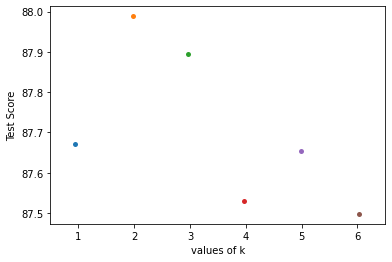

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

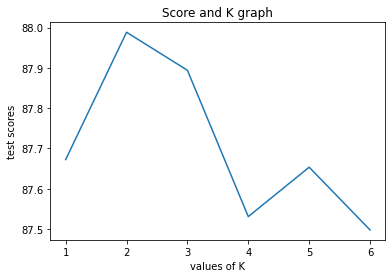

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Max accuracy at 87.8 with 2 features**

**Taking threshold 4.2**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
dataset

,YEAR,MONTH,DATE,Mw,Mb.1,Ms,ML,DEPTH (km),LAT_N,LONG_E,DANGER
0,2474.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
1,325.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,71.0,24.00,1
2,25.0,0.0,0.0,7.5000,6.969203,7.260620,7.427072,0.000000,72.9,33.72,1
3,26.0,5.0,10.0,6.1397,5.737047,5.698852,5.999685,45.569867,17.3,80.10,1
4,26.0,5.0,10.0,6.1397,5.737047,6.075520,5.999685,80.000000,26.0,97.00,1
...,...,...,...,...,...,...,...,...,...,...,...
52984,2019.0,7.0,28.0,3.2000,3.074275,2.323766,2.915005,10.000000,32.8,78.40,0
52985,2019.0,7.0,28.0,3.6000,3.436594,2.783008,3.334732,70.000000,25.5,90.40,0
52986,2019.0,7.0,28.0,4.0000,3.798913,3.242250,3.754460,22.000000,23.2,86.50,0
52987,2019.0,7.0,29.0,4.3000,4.070652,3.586682,4.069255,20.000000,32.8,76.40,1


In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


**Varying max features for 4.2 threshold**

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 72.09536390513934
Max-Feature is 2 with accuracy as 71.81858212241303
Max-Feature is 3 with accuracy as 72.27778826193621
Max-Feature is 4 with accuracy as 72.5734415298484
Max-Feature is 5 with accuracy as 72.22117380637856
Max-Feature is 6 with accuracy as 72.23375479650248


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


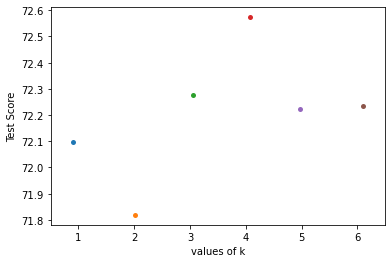

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

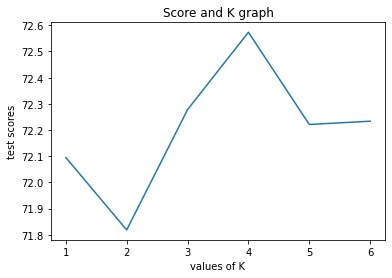

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Max accuracy is 73.7 with all features included**

**Taking threshold as 4.4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 64.00578725545701
Max-Feature is 2 with accuracy as 64.12530666163427
Max-Feature is 3 with accuracy as 63.722714977668744
Max-Feature is 4 with accuracy as 64.50273636535195
Max-Feature is 5 with accuracy as 64.62854626659119
Max-Feature is 6 with accuracy as 64.61596527646726


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


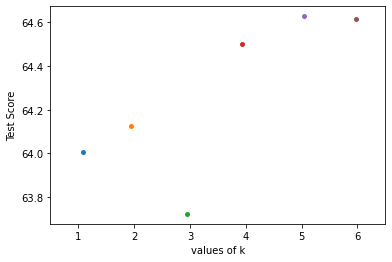

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

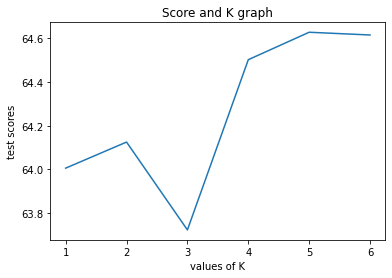

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Best accuracy is 65**

**Taking threshold as 4.6**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.6 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 62.58413537145373
Max-Feature is 2 with accuracy as 63.62206705667736
Max-Feature is 3 with accuracy as 63.43964269988048
Max-Feature is 4 with accuracy as 63.94917279989935
Max-Feature is 5 with accuracy as 63.94917279989935
Max-Feature is 6 with accuracy as 64.40837893942253


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


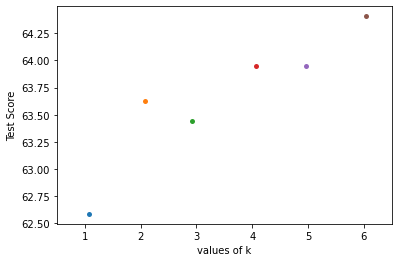

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

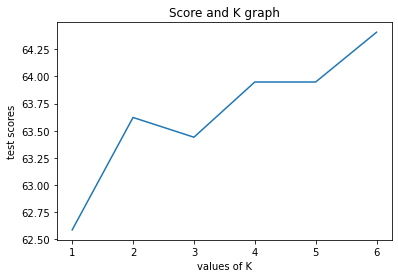

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Max accuracy is 65**

**Taking threshold as 4.8**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.8 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 68.54123419513115
Max-Feature is 2 with accuracy as 69.27093162231867
Max-Feature is 3 with accuracy as 69.06963578033591
Max-Feature is 4 with accuracy as 69.31496508775241
Max-Feature is 5 with accuracy as 69.5917468704787
Max-Feature is 6 with accuracy as 69.76788073221363


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


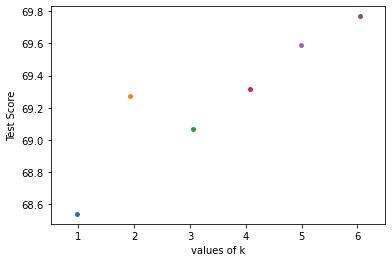

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

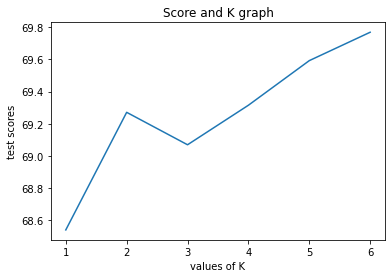

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Max accuracy is 70**

**Taking threshold as 5**

In [ ]:
dataset['DANGER'] = [1 if x >= 5 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 7):
  model_DT = DecisionTreeClassifier(max_features=k)
  K.append(k)
  model_DT.fit(X_train, Y_train)
  pred_DT = model_DT.predict(X_test)
  correct_DT = np.sum(pred_DT == Y_test)
  test.append(correct_DT*100 / len(Y_test))
  print("Max-Feature is", k , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 1 with accuracy as 77.78826193621438
Max-Feature is 2 with accuracy as 78.08391520412657
Max-Feature is 3 with accuracy as 78.89538906711958
Max-Feature is 4 with accuracy as 78.26004906586148
Max-Feature is 5 with accuracy as 78.36069698685287
Max-Feature is 6 with accuracy as 78.46763540290621


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


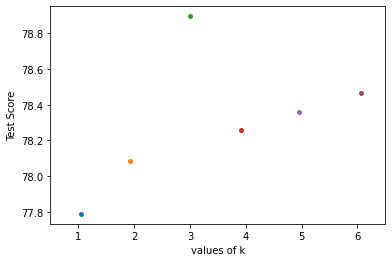

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

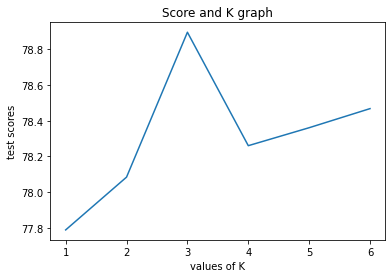

In [ ]:
plt.plot(K,test)
plt.xlabel('values of K')
plt.ylabel('test scores')
plt.title('Score and K graph')
plt.show()

**Max accuracy is 79.2**

# **ADA BOOST CLASSIFIER**

**For threshold at 4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 91.18701641819212
Estimators is 15 with accuracy as 91.47008869598038
Estimators is 20 with accuracy as 91.53299364659999
Estimators is 25 with accuracy as 91.53299364659999
Estimators is 30 with accuracy as 91.47637919104234
Estimators is 35 with accuracy as 91.47637919104234
Estimators is 40 with accuracy as 91.4826696861043
Estimators is 45 with accuracy as 91.4826696861043
Estimators is 50 with accuracy as 91.47637919104234
Estimators is 55 with accuracy as 91.47637919104234
Estimators is 60 with accuracy as 91.47008869598038
Estimators is 65 with accuracy as 91.49525067622822
Estimators is 70 with accuracy as 91.55815562684784
Estimators is 75 with accuracy as 91.5644461219098
Estimators is 80 with accuracy as 91.55186513178587
Estimators is 85 with accuracy as 91.54557463672391
Estimators is 90 with accuracy as 91.54557463672391
Estimators is 95 with accuracy as 91.54557463672391
Estimators is 100 with accuracy as 91.53928414166195


Text(0.5, 1.0, 'Accuracy v/s Max-Features')

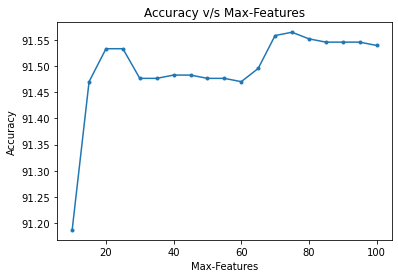

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


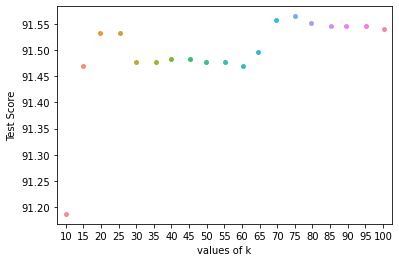

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Highest Accuracy is 91.57 at 75 estimators**

**Taking Threshold at 4.2**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 79.73202491036045
Estimators is 15 with accuracy as 79.76347738567026
Estimators is 20 with accuracy as 79.7886393659181
Estimators is 25 with accuracy as 79.68799144492671
Estimators is 30 with accuracy as 79.75089639554633
Estimators is 35 with accuracy as 79.6250864943071
Estimators is 40 with accuracy as 79.55589104862553
Estimators is 45 with accuracy as 79.55589104862553
Estimators is 50 with accuracy as 79.51814807825376
Estimators is 55 with accuracy as 79.56847203874945
Estimators is 60 with accuracy as 79.47411461282003
Estimators is 65 with accuracy as 79.58734352393533
Estimators is 70 with accuracy as 79.51814807825376
Estimators is 75 with accuracy as 79.46782411775807
Estimators is 80 with accuracy as 79.49298609800591
Estimators is 85 with accuracy as 79.46782411775807
Estimators is 90 with accuracy as 79.52443857331572
Estimators is 95 with accuracy as 79.52443857331572
Estimators is 100 with accuracy as 79.53072906837768


Text(0.5, 1.0, 'Accuracy v/s Max-Features')

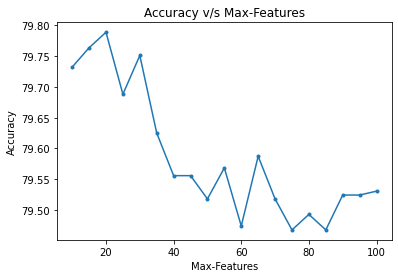

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


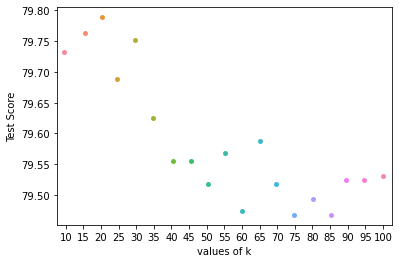

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Max accuracy is 79.9 at 20 estimators**

**Taking threshold at 4.4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 68.35880983833428
Estimators is 15 with accuracy as 68.26445241240485
Estimators is 20 with accuracy as 68.8746304334151
Estimators is 25 with accuracy as 68.8431779581053
Estimators is 30 with accuracy as 69.11366924576964
Estimators is 35 with accuracy as 69.10737875070768
Estimators is 40 with accuracy as 69.32125558281437
Estimators is 45 with accuracy as 69.40932251368183
Estimators is 50 with accuracy as 69.4470654840536
Estimators is 55 with accuracy as 69.6923947914701
Estimators is 60 with accuracy as 69.60432786060262
Estimators is 65 with accuracy as 69.57916588035478
Estimators is 70 with accuracy as 69.44077498899163
Estimators is 75 with accuracy as 69.49109894948732
Estimators is 80 with accuracy as 69.4785179593634
Estimators is 85 with accuracy as 69.49109894948732
Estimators is 90 with accuracy as 69.3967415235579
Estimators is 95 with accuracy as 69.55400390010693
Estimators is 100 with accuracy as 69.4470654840536


Text(0.5, 1.0, 'Accuracy v/s Estimators')

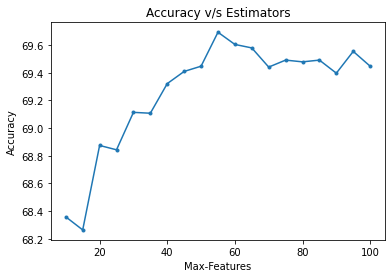

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


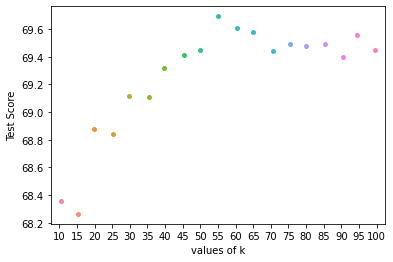

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Maximum accuracy is 69.7 at 55 estimators**

**Taking threshold as 4.6**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.6 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 64.62854626659119
Estimators is 15 with accuracy as 65.88664527898345
Estimators is 20 with accuracy as 66.21375102220544
Estimators is 25 with accuracy as 66.81134805309178
Estimators is 30 with accuracy as 66.83021953827766
Estimators is 35 with accuracy as 67.01264389507455
Estimators is 40 with accuracy as 67.04409637038435
Estimators is 45 with accuracy as 67.4907215197836
Estimators is 50 with accuracy as 67.3145876580487
Estimators is 55 with accuracy as 67.22023023211926
Estimators is 60 with accuracy as 67.40265458891615
Estimators is 65 with accuracy as 67.62911241114676
Estimators is 70 with accuracy as 67.48443102472164
Estimators is 75 with accuracy as 67.45297854941184
Estimators is 80 with accuracy as 67.44668805434988
Estimators is 85 with accuracy as 67.54733597534126
Estimators is 90 with accuracy as 67.72346983707618
Estimators is 95 with accuracy as 67.79266528275775
Estimators is 100 with accuracy as 67.66056488645657


Text(0.5, 1.0, 'Accuracy v/s Estimators')

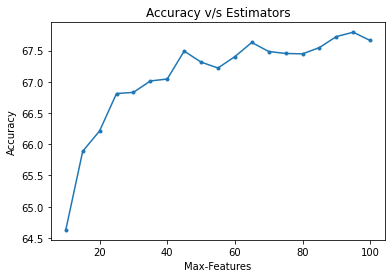

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


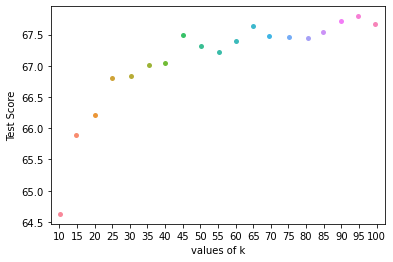

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Maximum accuracy of 69.8 at 95 estimators**

**Taking Threshold as 4.8**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.8 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 71.66761024092597
Estimators is 15 with accuracy as 72.89425677800843
Estimators is 20 with accuracy as 71.83745360759892
Estimators is 25 with accuracy as 72.97603321381392
Estimators is 30 with accuracy as 73.08297162986727
Estimators is 35 with accuracy as 73.36604390765554
Estimators is 40 with accuracy as 73.2087815311065
Estimators is 45 with accuracy as 73.29684846197395
Estimators is 50 with accuracy as 73.28426747185003
Estimators is 55 with accuracy as 73.68685915581557
Estimators is 60 with accuracy as 73.69944014593949
Estimators is 65 with accuracy as 73.80637856199283
Estimators is 70 with accuracy as 73.52330628420457
Estimators is 75 with accuracy as 73.61137321507202
Estimators is 80 with accuracy as 73.68685915581557
Estimators is 85 with accuracy as 73.76863559162106
Estimators is 90 with accuracy as 73.74347361137322
Estimators is 95 with accuracy as 73.85041202742656
Estimators is 100 with accuracy as 73.88186450273636


Text(0.5, 1.0, 'Accuracy v/s Estimators')

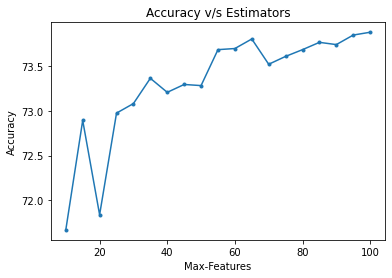

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


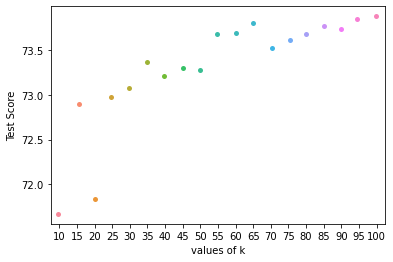

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Maximum accuracy is 73.9 at 100 estimators**

**Taking threshold as 5**

In [ ]:
dataset['DANGER'] = [1 if x >= 5.0 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

Estimators is 10 with accuracy as 83.68874630433415
Estimators is 15 with accuracy as 83.7956847203875
Estimators is 20 with accuracy as 83.78939422532554
Estimators is 25 with accuracy as 83.9906900673083
Estimators is 30 with accuracy as 83.67616531421022
Estimators is 35 with accuracy as 83.73907026482985
Estimators is 40 with accuracy as 83.77681323520162
Estimators is 45 with accuracy as 84.05988551298987
Estimators is 50 with accuracy as 84.11020947348557
Estimators is 55 with accuracy as 84.35553878090205
Estimators is 60 with accuracy as 84.05988551298987
Estimators is 65 with accuracy as 84.10391897842361
Estimators is 70 with accuracy as 84.26118135497263
Estimators is 75 with accuracy as 84.27376234509656
Estimators is 80 with accuracy as 84.22972887966283
Estimators is 85 with accuracy as 84.21085739447695
Estimators is 90 with accuracy as 84.21085739447695
Estimators is 95 with accuracy as 84.21085739447695
Estimators is 100 with accuracy as 84.11020947348557


Text(0.5, 1.0, 'Accuracy v/s Estimators')

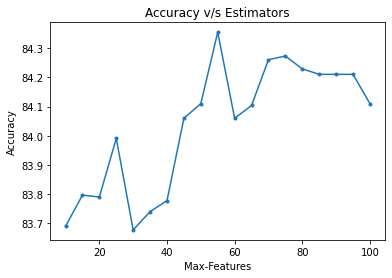

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
test = []
accuracy_Ada = list()
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

for k in K:
  clf = AdaBoostClassifier(n_estimators=k)
  clf.fit(X_train, Y_train)
  pred_Ada = clf.predict(X_test)
  correct_Ada = np.sum(pred_Ada == Y_test)
  test.append(correct_Ada*100 / len(Y_test))
  print("Estimators is", k , "with accuracy as", correct_Ada*100 / len(Y_test))

plt.plot(K, test, marker='.')
plt.xlabel("Max-Features")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Estimators")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


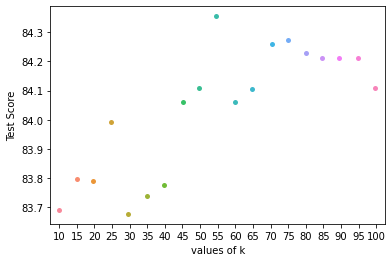

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')  
  
plt.show()

**Maximum Accuracy of 83.5 at 55 estimators**

**Since accuracy Max at threshold 4 hence ROC curve of threshold 4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
clf = AdaBoostClassifier(n_estimators=75)
clf.fit(X_train, Y_train)
pred_Ada = clf.predict(X_test)
correct_Ada = np.sum(pred_Ada == Y_test)
test = (correct_Ada*100 / len(Y_test))


In [ ]:
 y_train_score = clf.predict_proba(X_train)[:, 1]
 y_test_score = clf.predict_proba(X_test)[:, 1]
 auc_train = roc_auc_score(Y_train, y_train_score)
 auc_test = roc_auc_score(Y_test, y_test_score)

In [ ]:
def plot_roc_curve(Y_test, y_test_score):
 fpr, tpr, _ = roc_curve(Y_test, y_test_score)
 roc_auc = auc(fpr, tpr)
 plt.figure()
 plt.plot(fpr, tpr, label= "ROC curve (area = %0.2f)" % roc_auc)
 plt.plot([0, 1], [0, 1], "k")
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel("False Positive Rate")
 plt.ylabel("True Positive Rate")
 plt.title("Receiver operating characteristic")
 plt.show()

# **Plotting ROC for threshold 4**

In [ ]:
dataset['DANGER'] = [1 if x >= 4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.675901
3,0.710452
4,0.734136
5,0.754785
6,0.769033
7,0.781623
8,0.791763
9,0.799177
10,0.800484
11,0.804742


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.619701
2,0.622426
3,0.620658
4,0.621691
5,0.625157
6,0.632035


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.826677
2,0.833471
3,0.833813
4,0.835204
5,0.834549
6,0.836463
7,0.835185
8,0.835323
9,0.836189
10,0.835830


**Plotting ROC Curve for K = 9,10,11,12**

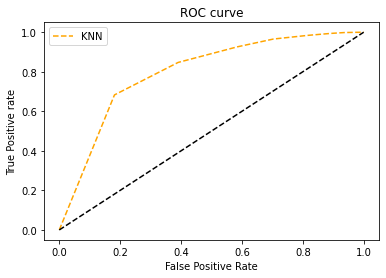

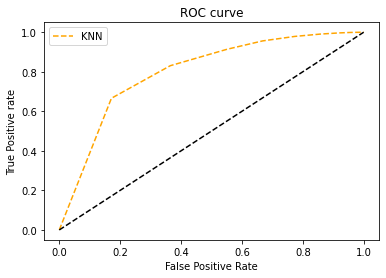

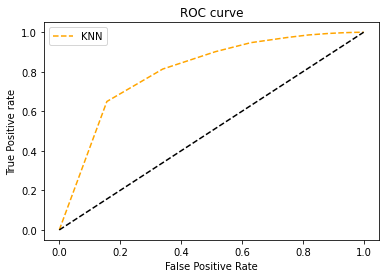

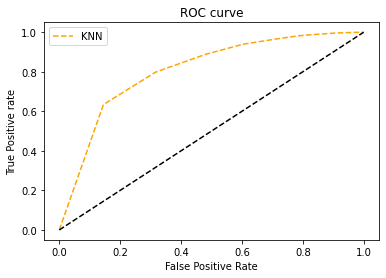

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

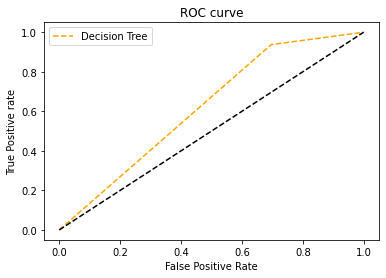

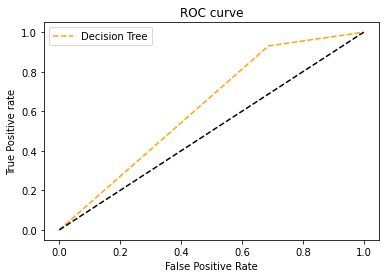

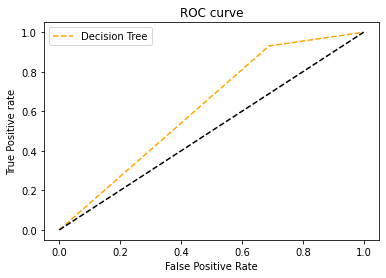

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

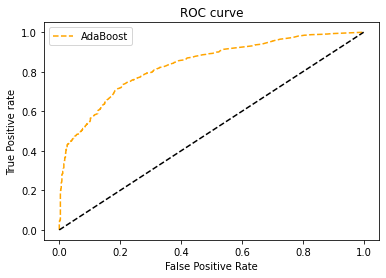

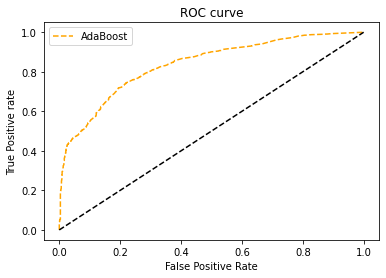

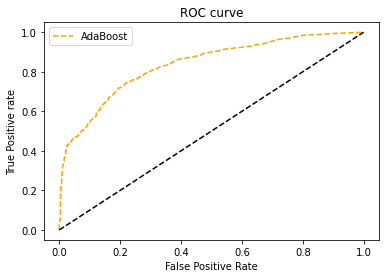

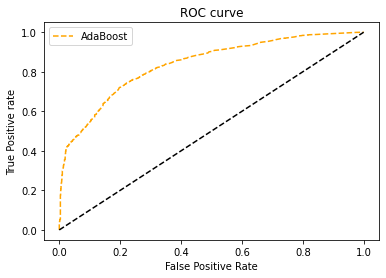

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC from the best results of all three algorithms together**

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
pred_prob1 = clf_knn.predict_proba(X_test)
pred_prob2 = model_DT.predict_proba(X_test)
pred_prob3 = clf_ada.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.804742340499454 0.6155398845904769 0.8384968094769898


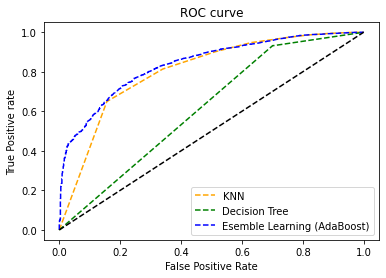

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

**As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.**

# **ROC Curve for 4.2 Threshold**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.625853
3,0.650052
4,0.666649
5,0.679282
6,0.690134
7,0.697665
8,0.703243
9,0.708055
10,0.710889
11,0.712956


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.582077
2,0.594169
3,0.585436
4,0.594251
5,0.599221
6,0.593698


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.701192
2,0.705817
3,0.708704
4,0.712568
5,0.714939
6,0.717206
7,0.719049
8,0.720985
9,0.722142
10,0.722667


**Plotting ROC Curve for K = 9,10,11,12**

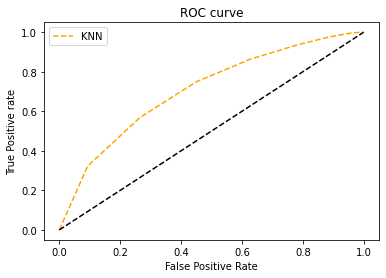

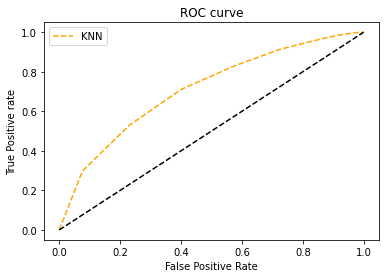

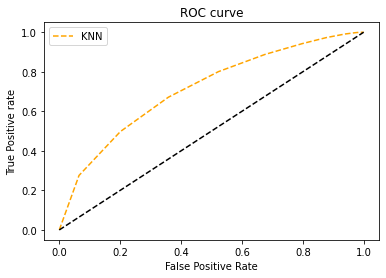

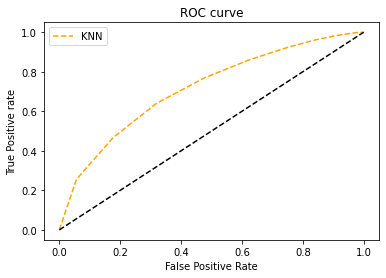

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

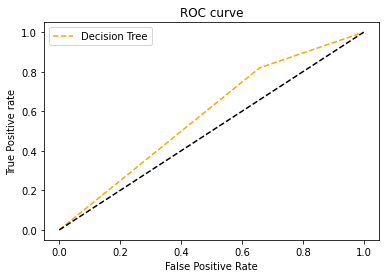

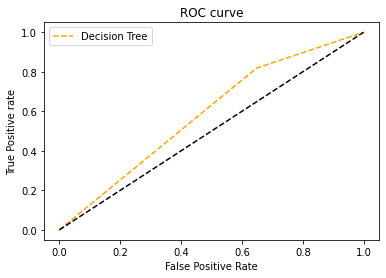

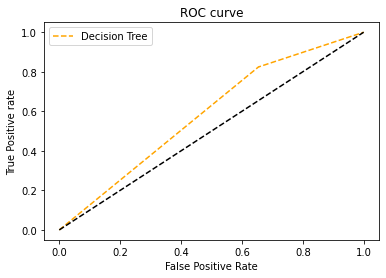

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

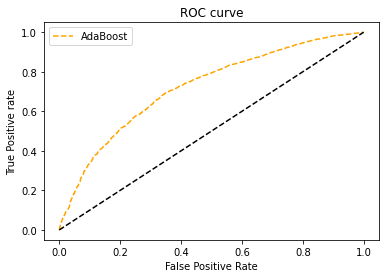

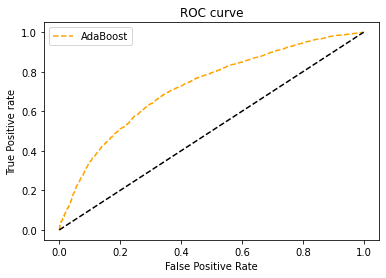

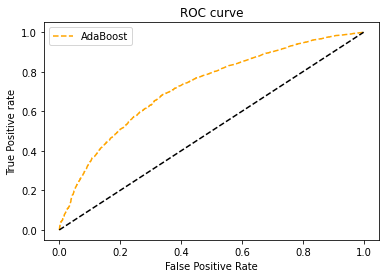

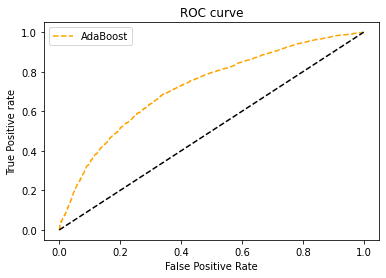

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting the best features ROC for all 3 algorithms for that threshold together**

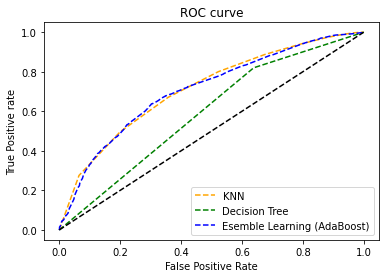

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

**As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.**

# **ROC curve for 4.4 threshold**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.4 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.664898
3,0.690197
4,0.704344
5,0.714445
6,0.722475
7,0.729289
8,0.732739
9,0.736461
10,0.737857
11,0.738490


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.618209
2,0.622205
3,0.627739
4,0.630120
5,0.626356
6,0.626339


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.721367
2,0.729936
3,0.734659
4,0.736417
5,0.739066
6,0.740723
7,0.741389
8,0.742692
9,0.743997
10,0.745152


**Plotting ROC Curve for K = 9,10,11,12**

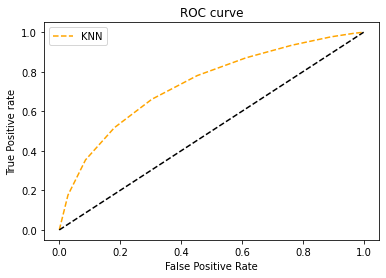

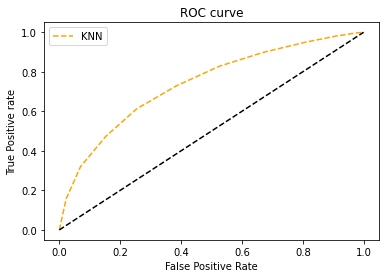

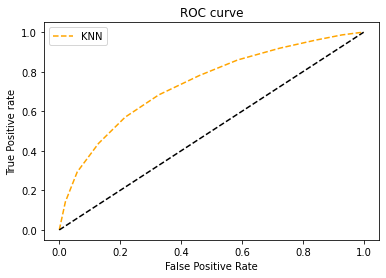

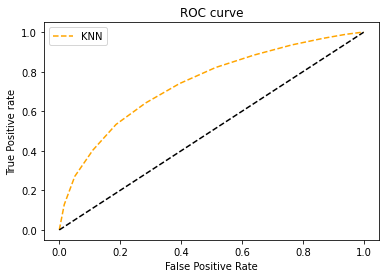

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

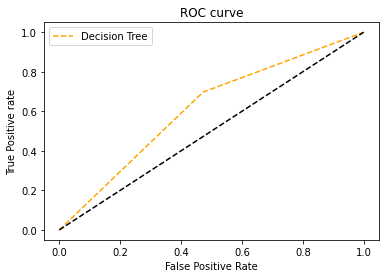

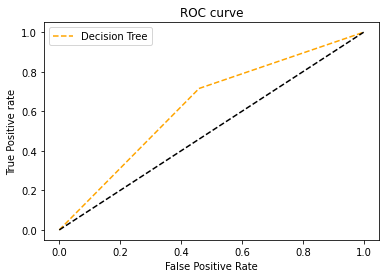

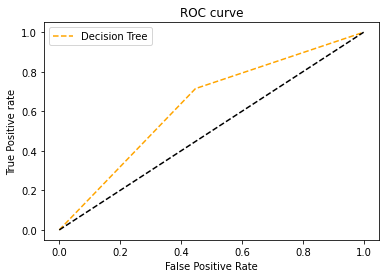

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

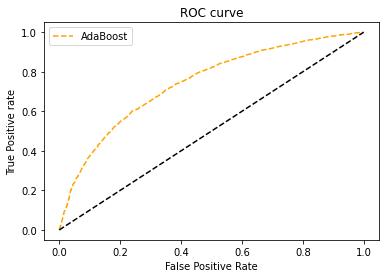

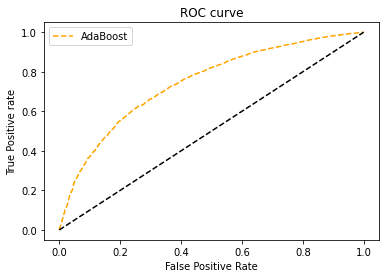

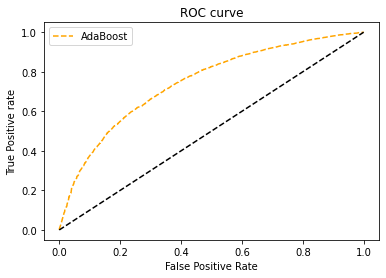

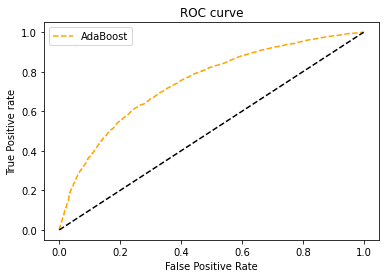

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting the best features ROC for all 3 algorithms for that threshold together**

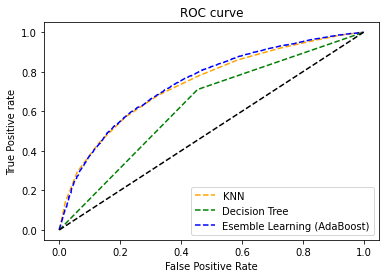

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

**As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.**

# **ROC curve for 4.6 threshold**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.6 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.665276
3,0.688573
4,0.701747
5,0.711306
6,0.717206
7,0.722812
8,0.727324
9,0.730612
10,0.732127
11,0.732421


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.621379
2,0.627328
3,0.628207
4,0.628321
5,0.635212
6,0.634789


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.687116
2,0.697419
3,0.700339
4,0.706989
5,0.707672
6,0.709464
7,0.711648
8,0.712945
9,0.714093
10,0.714235


**Plotting ROC Curve for K = 9,10,11,12**

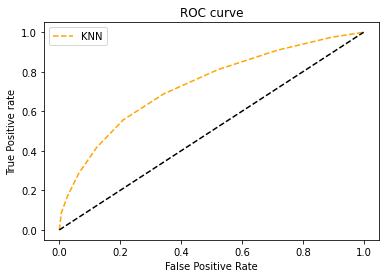

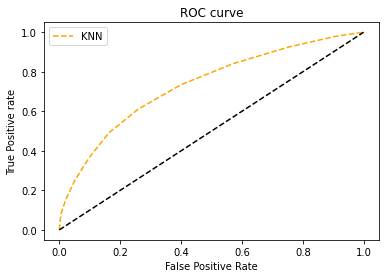

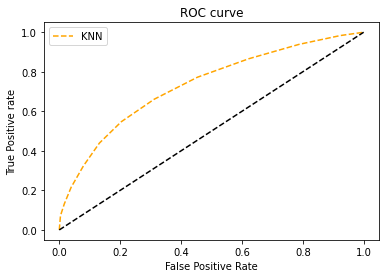

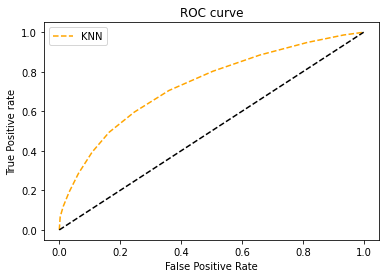

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

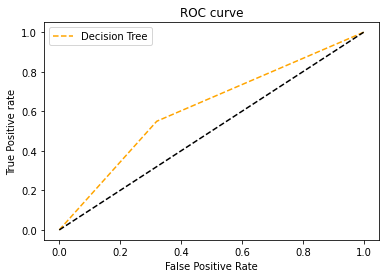

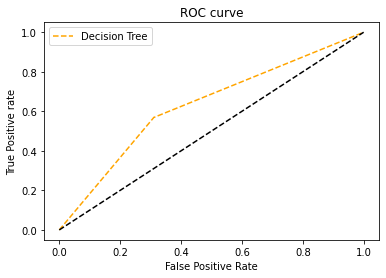

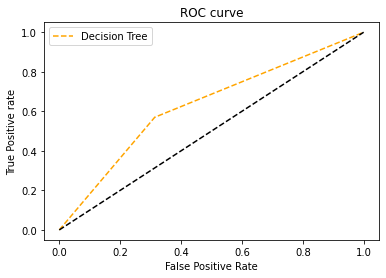

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

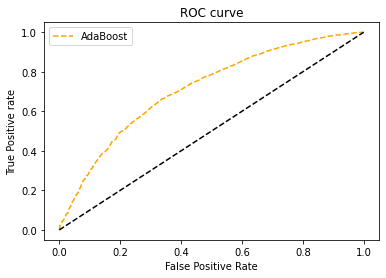

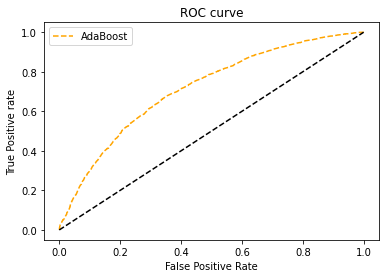

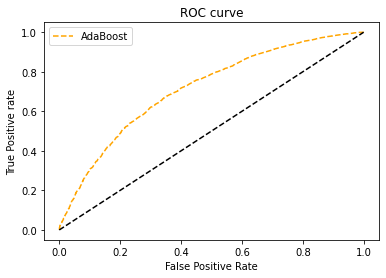

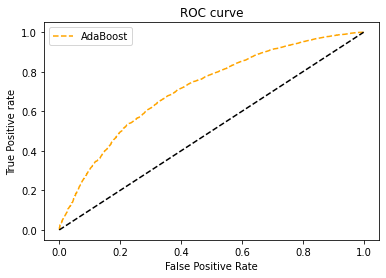

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting the best features ROC for all 3 algorithms for that threshold together**

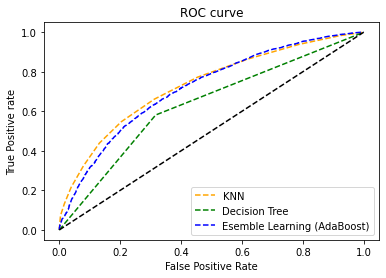

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

****As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.****

# **ROC curve for 4.8 Threshold**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.625853
3,0.650052
4,0.666649
5,0.679282
6,0.690134
7,0.697665
8,0.703243
9,0.708055
10,0.710889
11,0.712956


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.583874
2,0.591109
3,0.589216
4,0.585779
5,0.594616
6,0.590977


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.701192
2,0.705817
3,0.708704
4,0.712568
5,0.714939
6,0.717206
7,0.719049
8,0.720985
9,0.722142
10,0.722667


**Plotting ROC Curve for K = 9,10,11,12**

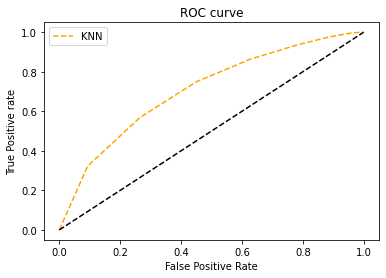

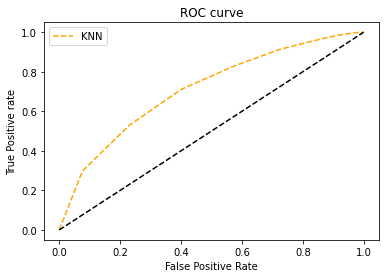

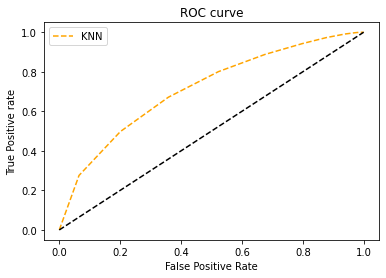

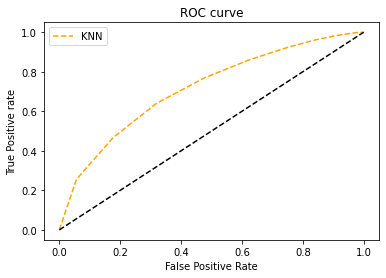

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

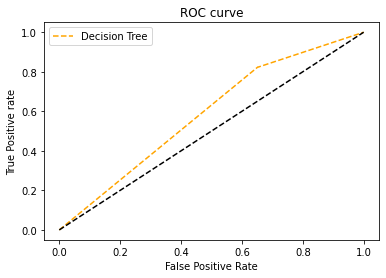

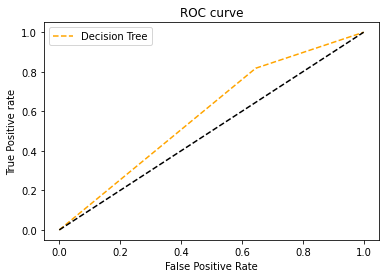

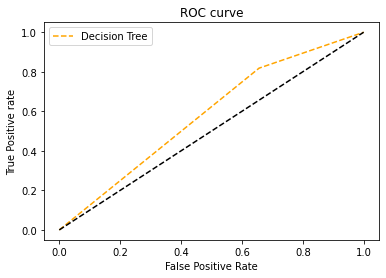

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

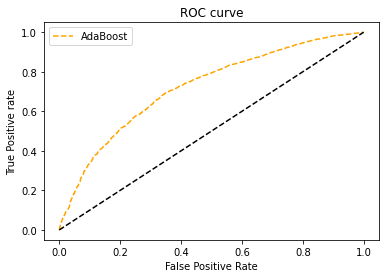

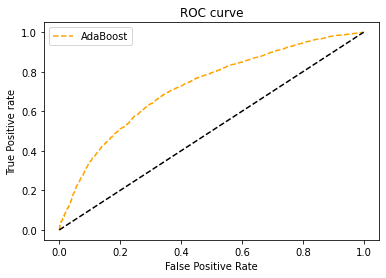

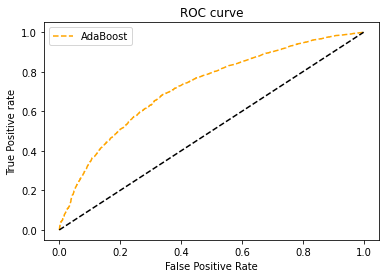

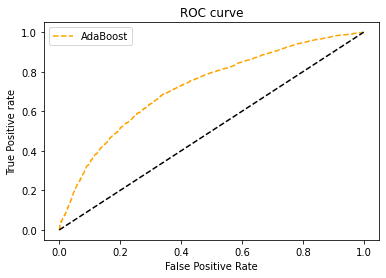

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting the best features ROC for all 3 algorithms for that threshold together**

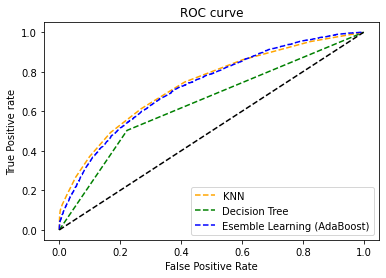

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

**As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.**

# **Roc Curve for 5 threshold**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.2 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

In [ ]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 

In [ ]:
clf_ada = AdaBoostClassifier(n_estimators=75)
clf_knn = KNeighborsClassifier(n_neighbors = 11)
model_DT = DecisionTreeClassifier(max_features=2)
clf_ada.fit(X_train,Y_train)
clf_knn.fit(X_train,Y_train)
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Finding Area under the curves for all values of K in Knn**

In [ ]:
scores_knn = []
for i in range(2,21):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_knn.append(auc_score1)

  

In [ ]:
df = pd.DataFrame(scores_knn, index =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
2,0.625853
3,0.650052
4,0.666649
5,0.679282
6,0.690134
7,0.697665
8,0.703243
9,0.708055
10,0.710889
11,0.712956


**Finding Area Under the curves for different features in DT**

In [ ]:
scores_DT = []
for i in range(1,7):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_DT.append(auc_score1)

In [ ]:
df = pd.DataFrame(scores_DT, index =[1,2,3,4,5,6],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.580480
2,0.595453
3,0.587726
4,0.587148
5,0.590143
6,0.585357


**Area under the curve for ADABOOST**

In [ ]:
K=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
scores_ada = []
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
  scores_ada.append(auc_score1)


In [ ]:
df = pd.DataFrame(scores_ada, index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                              columns =['Area Under the Curve'])
df

,Area Under the Curve
1,0.701192
2,0.705817
3,0.708704
4,0.712568
5,0.714939
6,0.717206
7,0.719049
8,0.720985
9,0.722142
10,0.722667


**Plotting ROC Curve for K = 9,10,11,12**

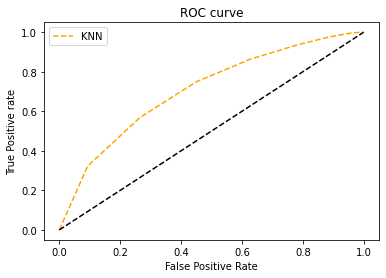

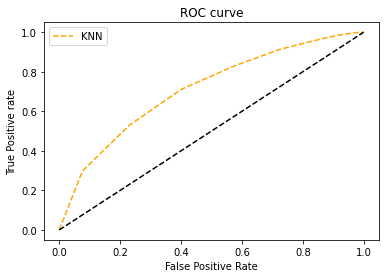

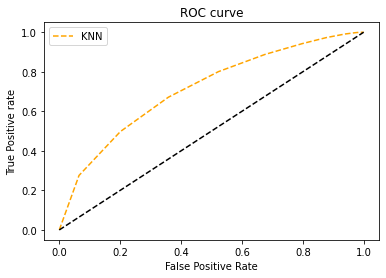

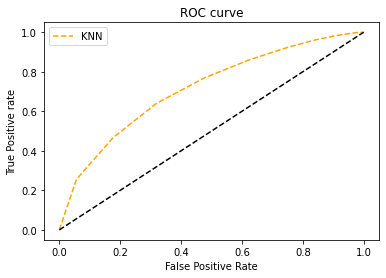

In [ ]:

for i in range(9,13):
  clf_knn = KNeighborsClassifier(n_neighbors = i)
  clf_knn.fit(X_train,Y_train)
  pred_prob1 = clf_knn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();
  

**Plotting ROC curves for DT with different features**

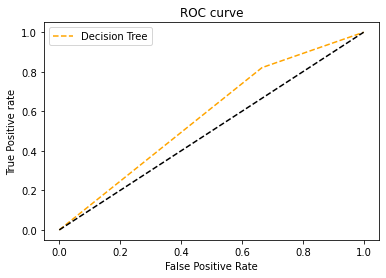

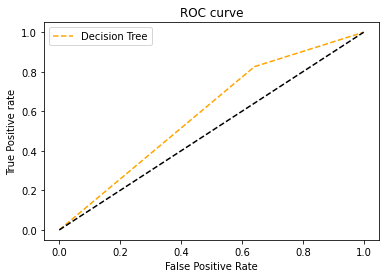

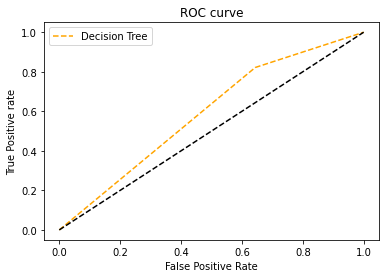

In [ ]:
for i in range(1,4):
  model_DT = DecisionTreeClassifier(max_features=i)
  model_DT.fit(X_train,Y_train)
  pred_prob1 = model_DT.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting ROC for ADAboost with estimators**

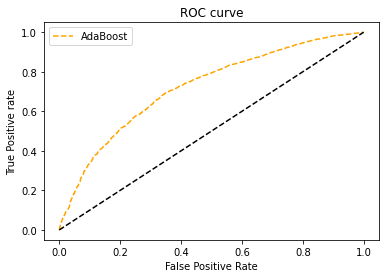

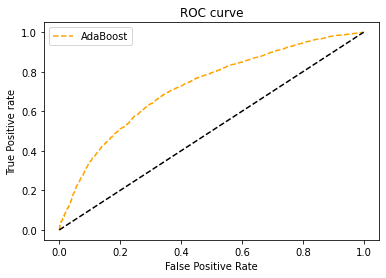

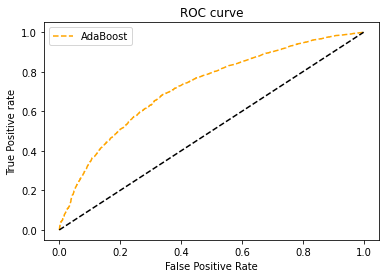

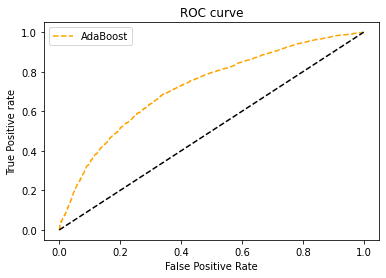

In [ ]:
K=[45,50,55,60]
for i in K:
  clf_ada = AdaBoostClassifier(n_estimators=i)
  clf_ada.fit(X_train,Y_train)
  pred_prob1 = clf_ada.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
  random_probs = [0 for i in range(len(Y_test))]
  p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='AdaBoost')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

**Plotting the best features ROC for all 3 algorithms for that threshold together**

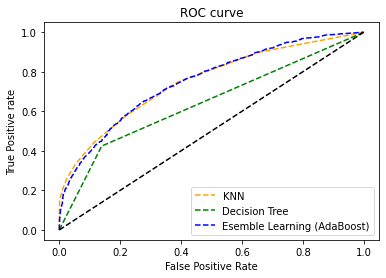

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()

**As we can see Esemble Learning performs best followed by KNN and Decision Tree is at last.**

# **Finding 2 features which will be sufficient in predicting the earthquakes**

In [ ]:
dataset['DANGER'] = [1 if x >= 4.0 else 0 for x in dataset['Mw']]

In [ ]:
from sklearn.model_selection import train_test_split
dataset1 = dataset.drop(columns=['Mw','Mb.1','Ms','ML'], axis = 1)
X = dataset1.iloc[:,:-1].values
Y = dataset1.iloc[:,6].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


**Varying max features for threshold 4**

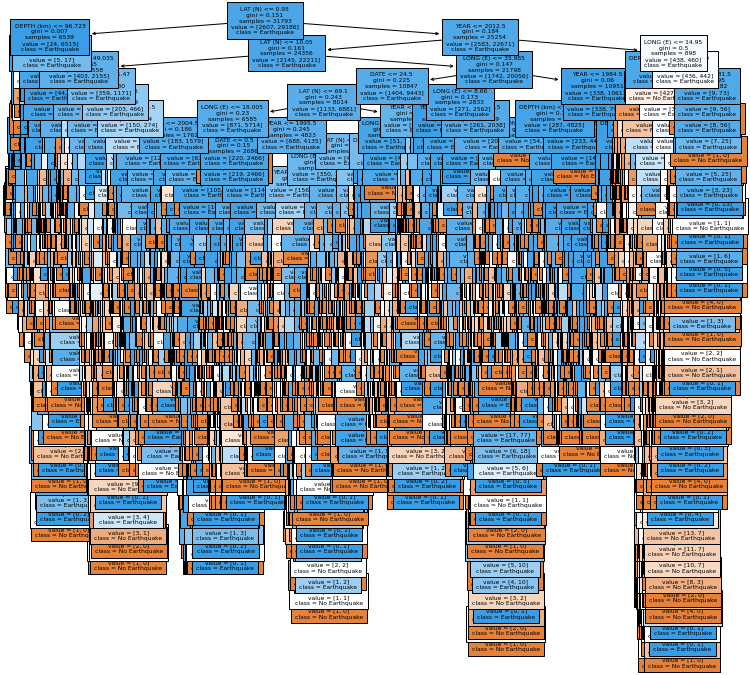

In [ ]:
model_DT = DecisionTreeClassifier(max_features=3)
model_DT.fit(X_train, Y_train)
from sklearn import tree
fn = ['YEAR',    'MONTH'    , 'DATE',    'LAT (N)'    , 'LONG (E)', 'DEPTH (km)']
cn = ['No Earthquake', 'Earthquake']
plt.figure(figsize=(12,12))
tree.plot_tree(model_DT, fontsize=6, feature_names = fn, class_names=cn, filled = True)
plt.savefig('tree_high_dpi', dpi=100)

[0.14779308 0.10474584 0.14175241 0.10746424 0.22242907 0.27581536]


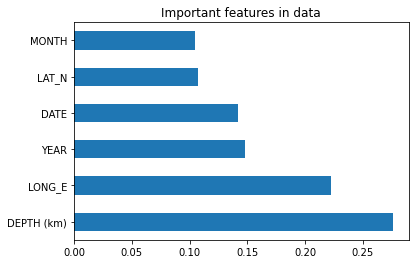

In [ ]:
import pandas as pd
import numpy as np
fn = ['YEAR',    'MONTH'    , 'DATE',    'LAT_N'    , 'LONG_E', 'DEPTH (km)']

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_features=6)
model.fit(X_train, Y_train)

print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=fn)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Important features in data")
plt.show()

**The root is Long(E) and the 2 best node is Year and Depth hence these 2 can be used to predict the earthquakes**

**Taking Depth and Year for finding the classification**

In [ ]:
dataset_new = dataset[['DEPTH (km)','YEAR ','DANGER']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset_new.iloc[:,:-1].values
Y = dataset_new.iloc[:,2].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

**For KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train, Y_train)
training_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print("Accuracy: " + str(test_score))

Accuracy: 0.9174057998364471


**For DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_DT = DecisionTreeClassifier(max_features=2)
model_DT.fit(X_train, Y_train)
pred_DT = model_DT.predict(X_test)
correct_DT = np.sum(pred_DT == Y_test)
print("Max-Feature is", 2 , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 2 with accuracy as 89.32502987985154


**Fot Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
pred_Ada = clf.predict(X_test)
correct_Ada = np.sum(pred_Ada == Y_test)
print("Estimators is", 100 , "with accuracy as", correct_Ada*100 / len(Y_test))




Estimators is 100 with accuracy as 91.52041265647607


In [ ]:
list2 = [91.74,89.53,92.05]
list1 = ['KNN','Decision Tree','AdaBoost']
df = pd.DataFrame(list(zip(list1, list2)),
               columns =['Algo_Name', 'Accuracy'])
df

,Algo_Name,Accuracy
0,KNN,91.74
1,Decision Tree,89.53
2,AdaBoost,92.05


# **Taking the above 2 features along with latitude to find the accuracy**

In [ ]:
dataset_new = dataset[['LAT_N','DEPTH (km)','YEAR ','DANGER']]

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset_new.iloc[:,:-1].values
Y = dataset_new.iloc[:,3].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 5)

**For KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train, Y_train)
training_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print("Accuracy: " + str(test_score))

Accuracy: 0.9150154117129018


**For DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_DT = DecisionTreeClassifier(max_features=3)
model_DT.fit(X_train, Y_train)
pred_DT = model_DT.predict(X_test)
correct_DT = np.sum(pred_DT == Y_test)
print("Max-Feature is", 2 , "with accuracy as", correct_DT*100 / len(Y_test))

Max-Feature is 2 with accuracy as 87.32465245014782


**Fot Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=100)
clf_ada.fit(X_train, Y_train)
pred_Ada = clf.predict(X_test)
correct_Ada = np.sum(pred_Ada == Y_test)
print("Estimators is", 100 , "with accuracy as", correct_Ada*100 / len(Y_test))



Estimators is 100 with accuracy as 91.54557463672391


In [ ]:
list2 = [91.90,87.32,92.75]
list1 = ['KNN','Decision Tree','AdaBoost']
df = pd.DataFrame(list(zip(list1, list2)),
               columns =['Algo_Name', 'Accuracy'])
df

,Algo_Name,Accuracy
0,KNN,91.90
1,Decision Tree,87.32
2,AdaBoost,92.75


**ROC CURVE FOR ABOVE 3**

In [ ]:
clf.fit(X_train, Y_train)
model_DT.fit(X_train, Y_train)
clf_ada.fit(X_train, Y_train)
pred_prob1 = clf.predict_proba(X_test)
pred_prob2 = model_DT.predict_proba(X_test)
pred_prob3 = clf_ada.predict_proba(X_test)


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

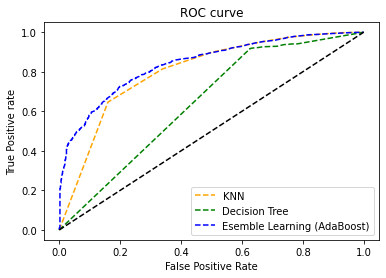

In [ ]:
def plot_roc_curve():
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='KNN')
  plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Decision Tree')
  plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='Esemble Learning (AdaBoost)')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

plot_roc_curve()